In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_tips = sns.load_dataset("tips")
data_flights = sns.load_dataset("flights")
data_penguins = sns.load_dataset("penguins")

In [4]:
data_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Grafici Relazionali 
1. Utilizzate il dataset tips per creare uno scatterplot che mostri la relazione tra total_bill e tip, differenziando i punti per il giorno della settimana (hue).
2. Realizzate un lineplot del dataset flights che visualizzi l'andamento dei passeggeri nel tempo (asse X = anni, asse Y = numero passeggeri).

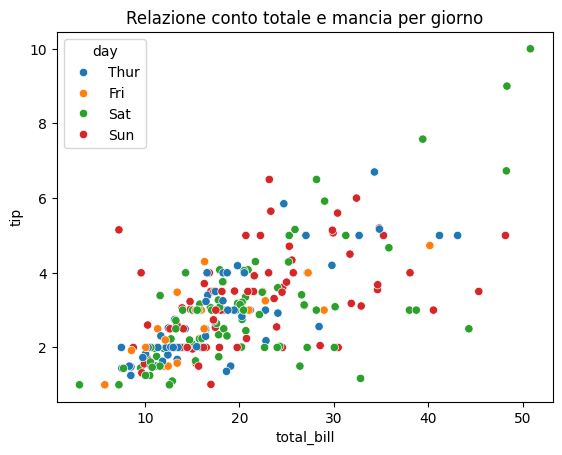

In [5]:
sns.scatterplot(data=data_tips, x="total_bill", y="tip", hue="day")
plt.title("Relazione conto totale e mancia per giorno")
plt.show()

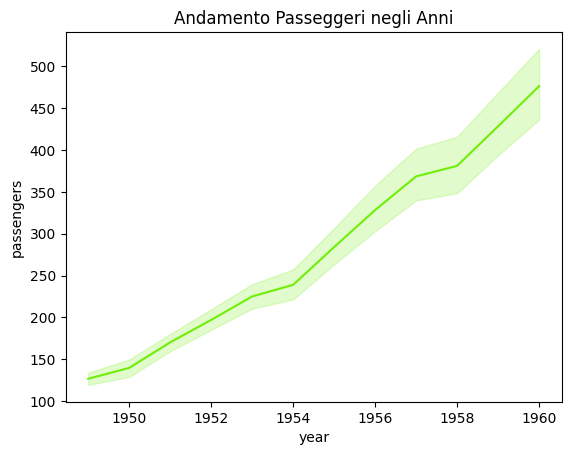

In [6]:
sns.lineplot(x='year', y= 'passengers', data=data_flights, color = "#6FEE07")
plt.title("Andamento Passeggeri negli Anni")
plt.show()

Fase 3: Grafici Categoriali 
1. Generate un barplot che mostri la media delle mance (tip) in base al giorno della settimana dal dataset tips.
2. Realizzate un violin plot con il dataset penguins per confrontare la distribuzione della lunghezza del becco (bill_length_mm) tra le diverse specie.

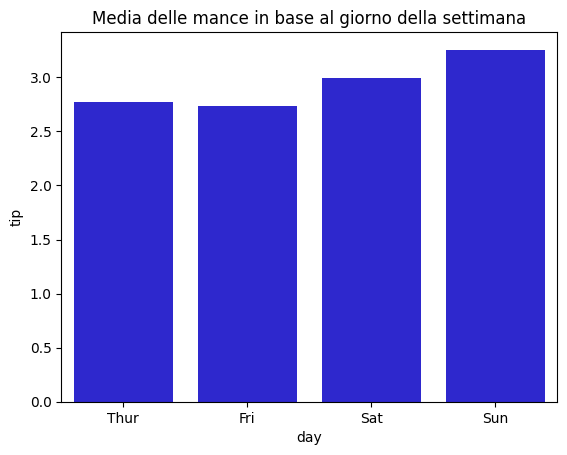

In [7]:
sns.barplot(x='day', y='tip', data=data_tips, estimator=np.mean, errorbar=None, color = "#140DE8")
plt.title("Media delle mance in base al giorno della settimana")
plt.show()

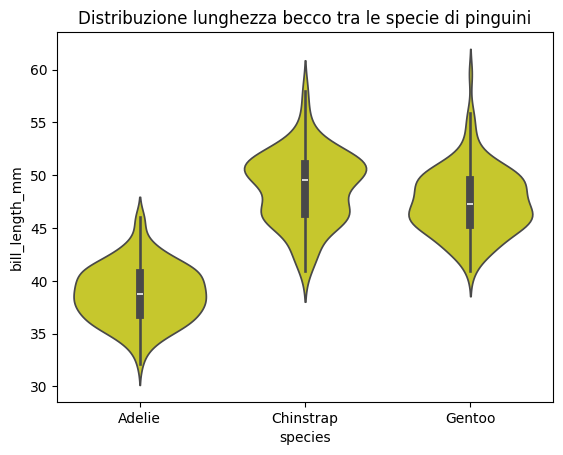

In [8]:
sns.violinplot(x='species', y='bill_length_mm', data=data_penguins, color = "#E0E014")
plt.title("Distribuzione lunghezza becco tra le specie di pinguini")
plt.show()

Fase 4: Grafici di Distribuzione 
1. Create un histogram della variabile total_bill dal dataset tips, aggiungendo anche una curva KDE.
2. Realizzate un pairplot del dataset penguins, utilizzando species come parametro hue.

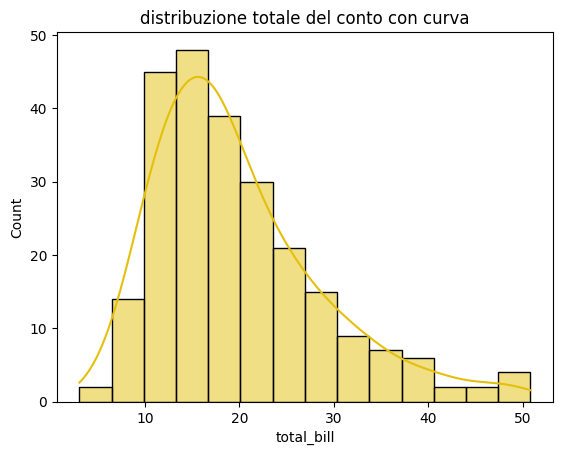

In [10]:
sns.histplot(data=data_tips, x="total_bill", kde=True, color="#E4C00C")
plt.title("distribuzione totale del conto con curva")
plt.show()


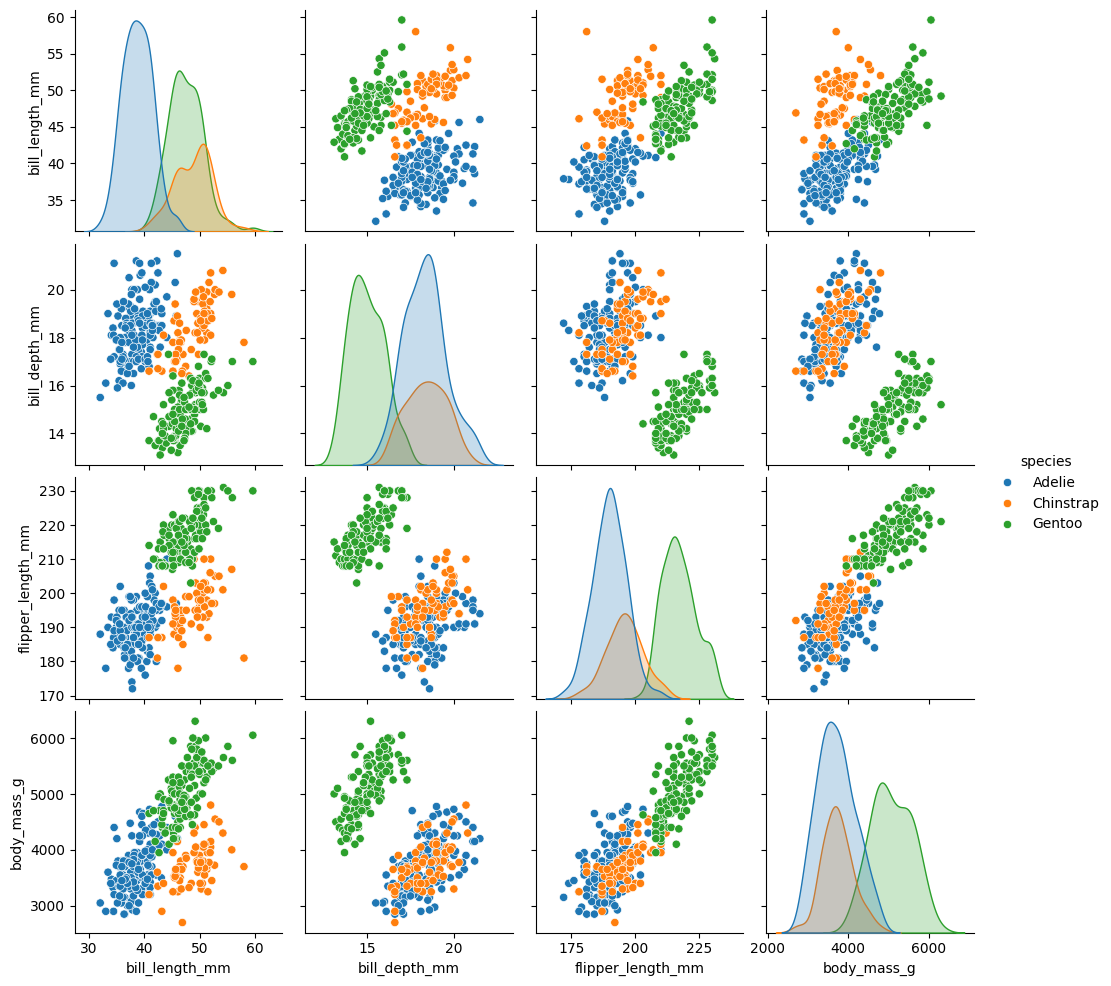

In [11]:
sns.pairplot(data=data_penguins, hue="species")
plt.show()

Fase 5: Grafici di Regressione 
1. Realizzate un regplot che visualizzi la relazione tra la lunghezza (bill_length_mm) e la profondità (bill_depth_mm) del becco dal dataset penguins.
2. Utilizzate lmplot per creare una regressione lineare separata per ogni isola (island) nel dataset penguins.

<function matplotlib.pyplot.show(close=None, block=None)>

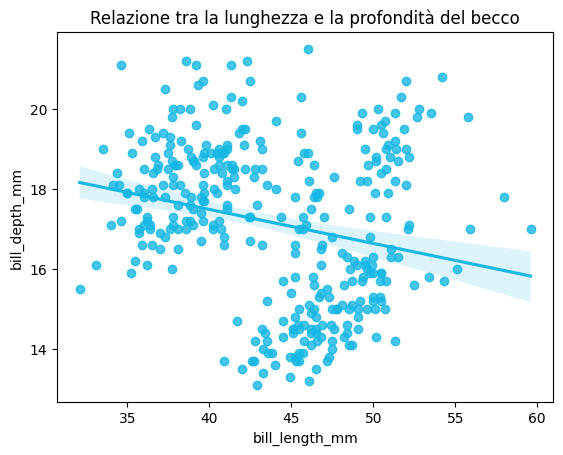

In [15]:
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data = data_penguins, color = "#16B7E4")
plt.title("Relazione tra la lunghezza e la profondità del becco")
plt.show

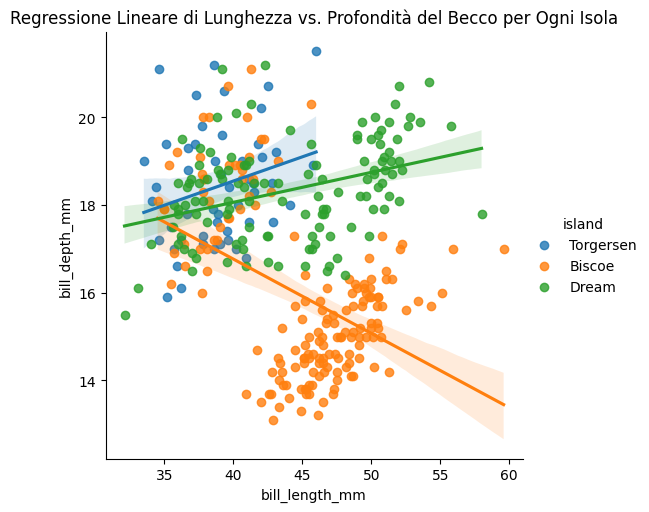

In [16]:
sns.lmplot(x='bill_length_mm', y='bill_depth_mm',hue='island', data = data_penguins)
plt.title('Regressione Lineare di Lunghezza vs. Profondità del Becco per Ogni Isola')
plt.show()

Fase 6: Grafici Matriciali 

1. Calcolate e rappresentate visivamente tramite una heatmap la matrice di correlazione di tutte le variabili numeriche del dataset penguins.
2. Realizzate una clustermap utilizzando il dataset flights per identificare possibili pattern annuali e mensili nel numero di passeggeri.   # Seleziona solo le variabili numeriche

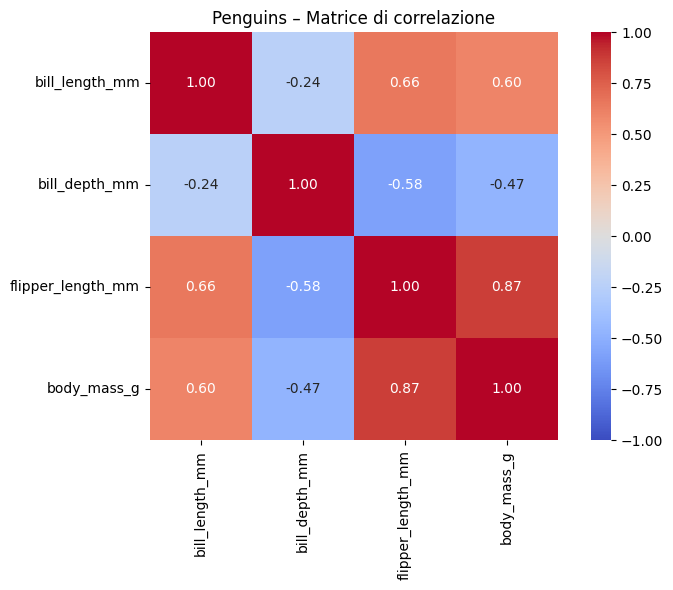

In [ ]:
num_vars = data_penguins.select_dtypes(include="number")
corr = num_vars.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True
)
plt.title("Penguins – Matrice di correlazione")
plt.tight_layout()
plt.show() 
flight_matrix = data_flights.pivot(index="year", columns="month", values="passengers")

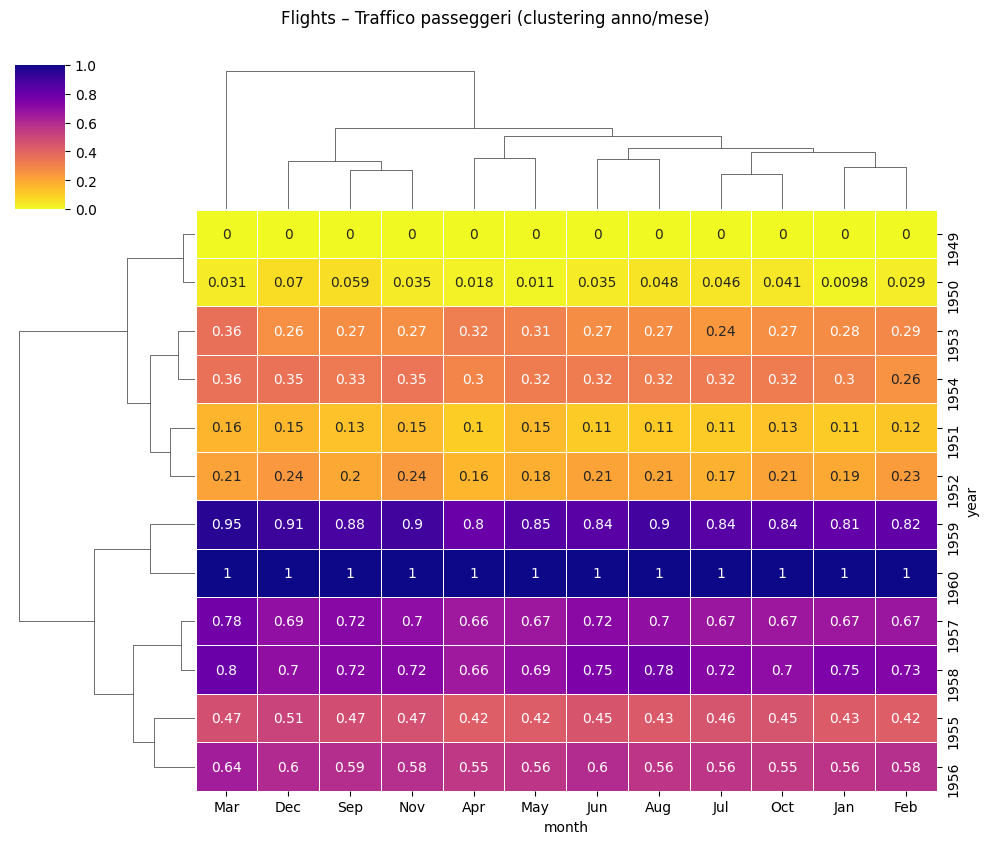

In [13]:
g = sns.clustermap(
    flight_matrix,
    annot = True,
    cmap="plasma_r",
    standard_scale=1,
    linewidths=.5,
    figsize=(10, 8)
)

g.figure.suptitle("Flights – Traffico passeggeri (clustering anno/mese)", y=1.05)
plt.show()